In [10]:
import math
import numpy as np
import csv
import pyevolve

In [15]:
city_id = []
city_coords = []

with open('TSP.csv', 'rb') as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        city_id.append(int(row[0]) - 1)
        city_coords.append((int(row[1]), int(row[2])))

In [16]:
p = np.random.permutation(city_id)
print p

[43 42 35  8 29 50  2  0 34 24  5 38 30 19 37  1 51 45 12  7 14  9 16 22 18
 32 27 33 41 11  6 44 15 36 25 23 26 49 47 10 40 48 39  4 46  3 28 31 21 17
 13 20]


In [17]:
def dist(p1, p2):
    return math.fabs(p1[0] - p2[0]) + math.fabs(p1[1] - p2[1])

def path_length(p):
    l = 0
    for i in range(len(p) - 1):
        l += dist(city_coords[p[i]], city_coords[p[i + 1]])
    return l

In [18]:
print path_length(p)

39755.0


In [46]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches

def show_path(p):
    verts = []
    for i in range(len(p) - 1):
        verts.append(city_coords[p[i]])
        verts.append((city_coords[p[i]][0], city_coords[p[i + 1]][1]))
        
    verts.append(city_coords[p[-1]])
    # verts = [city_coords[i] for i in p]

    codes = [Path.MOVETO] + [Path.LINETO] * (len(verts) - 1)

    path = Path(verts, codes)

    fig = plt.figure()
    ax = fig.add_subplot(111)
    patch = patches.PathPatch(path, facecolor='none', lw=0)
    ax.add_patch(patch)

    xs, ys = zip(*verts)
    ax.plot(xs, ys, '--', lw=1, color='black', ms=10)

    for i in p:
        ax.text(city_coords[i][0], city_coords[i][1], str(i))
    
    plt.show()

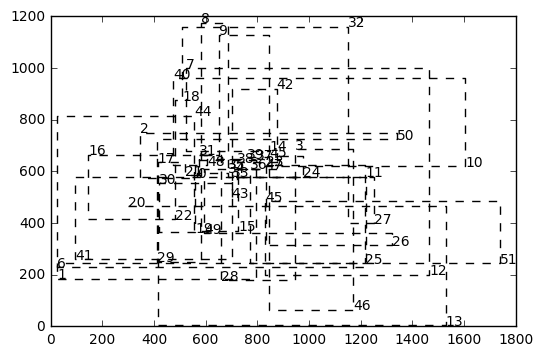

In [48]:
show_path(p)

In [52]:
from pyevolve import G1DList
from pyevolve import GSimpleGA
from pyevolve import GAllele
from pyevolve import Mutators
from pyevolve import Initializators
from pyevolve import DBAdapters
from pyevolve import Crossovers
from pyevolve import Consts


def eval_func(chromosome):
    return path_length(chromosome)

def G1DListTSPInitializator(genome, **args):
    genome.clearList()
    for i in np.random.permutation(city_id):
        genome.append(i)

def GA(gen_cnt=1000, cross_rate=1.0, mut_rate=0.03, pop_size=80):
    setOfAlleles = GAllele.GAlleles(homogeneous=True)
    lst = [ i for i in xrange(len(city_id)) ]
    a = GAllele.GAlleleList(lst)
    setOfAlleles.add(a)

    genome = G1DList.G1DList(len(city_id))
    genome.setParams(allele=setOfAlleles)

    genome.evaluator.set(eval_func)
    genome.mutator.set(Mutators.G1DListMutatorSwap)
    genome.crossover.set(Crossovers.G1DListCrossoverOX)
    genome.initializator.set(G1DListTSPInitializator)

    ga = GSimpleGA.GSimpleGA(genome)
    ga.setGenerations(gen_cnt)
    ga.setMinimax(Consts.minimaxType["minimize"])
    ga.setCrossoverRate(cross_rate)
    ga.setMutationRate(mut_rate)
    ga.setPopulationSize(pop_size)
    
    return ga

In [102]:
ga = GA(4000, 0.9, 0.02, 20)
ga.evolve(freq_stats=100)
best = ga.bestIndividual()
print best

Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [45699.30(40770.00)/29982.95(35225.00)/38082.75(38082.75)]
Gen. 100 (2.50%): Max/Min/Avg Fitness(Raw) [20680.80(19145.00)/14638.53(15795.00)/17234.00(17234.00)]
Gen. 200 (5.00%): Max/Min/Avg Fitness(Raw) [18744.30(16500.00)/10985.22(14315.00)/15620.25(15620.25)]
Gen. 300 (7.50%): Max/Min/Avg Fitness(Raw) [17423.10(16460.00)/11961.78(12810.00)/14519.25(14519.25)]
Gen. 400 (10.00%): Max/Min/Avg Fitness(Raw) [16565.70(16770.00)/12208.14(12090.00)/13804.75(13804.75)]
Gen. 500 (12.50%): Max/Min/Avg Fitness(Raw) [15695.70(14625.00)/10777.83(11720.00)/13079.75(13079.75)]
Gen. 600 (15.00%): Max/Min/Avg Fitness(Raw) [16345.80(16595.00)/11838.13(11675.00)/13621.50(13621.50)]
Gen. 700 (17.50%): Max/Min/Avg Fitness(Raw) [16461.00(15735.00)/10940.00(11675.00)/13717.50(13717.50)]
Gen. 800 (20.00%): Max/Min/Avg Fitness(Raw) [15596.10(15135.00)/11353.50(11645.00)/12996.75(12996.75)]
Gen. 900 (22.50%): Max/Min/Avg Fitness(Raw) [15849.30(15815.00)/11624.44(11645.

11645.0


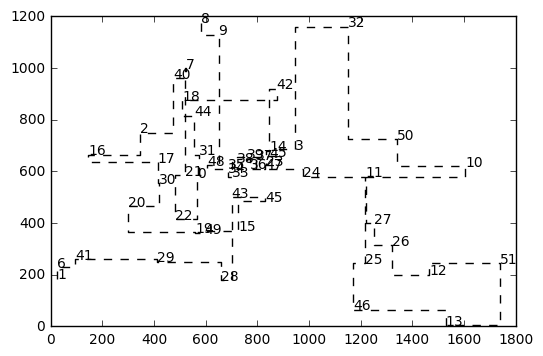

In [103]:
path_ga = [8, 9, 48, 35, 34, 33, 38, 4, 5, 3, 32, 50, 10, 11, 27, 26, 12, 51, 13, 46, 25, 24, 36, 39, 37, 47, 23, 14, 42, 18, 44, 31, 0, 22, 21, 7, 40, 2, 16, 17, 30, 20, 19, 49, 15, 45, 43, 28, 29, 41, 6, 1]
print(path_length(path_ga))
show_path(path_ga)

In [119]:
from random import randint

def mutator(p):
    i = randint(0, len(p)-1)
    j = randint(0, len(p)-1)
    while i == j:
        j = randint(0, len(p)-1)
    p2 = [x for x in p]
    p2[i], p2[j] = p2[j], p2[i]
    return p2

def stochastic_step(p, f):
    v = f(p)
    p2 = mutator(p)
    u = f(p2)
    i = 0
    while v <= u and i <= 100:
        p2 = mutator(p)
        u = f(p2)
        i += 1
    return p2
    

def steepest_step(p, f):
    v = f(p)
    min_v = v
    min_p = p
    for i in range(len(p)):
        for j in range(i+1, len(p)):
            p2 = [x for x in p]
            p2[i], p2[j] = p2[j], p2[i]
            u = f(p2)
            if u < v:
                min_v = u
                min_p = p2
    return min_p

def hill_climbing(p, eval_func, step_policy, n_epoch):
    p2 = [x for x in p]
    min_p = p
    min_v = eval_func(p)
    for i in range(n_epoch):
        p2 = step_policy(p2, eval_func)
        
        u = eval_func(p2)
        if u < min_v:
            min_v = u
            min_p = p2
    return min_p

In [174]:
path_hc = hill_climbing(p, path_length, stochastic_step, 1000)
print path_length(path_hc)

10985.0


In [178]:
path_hc2 = hill_climbing(p, path_length, steepest_step, 1000)
print path_length(path_hc2)

10910.0


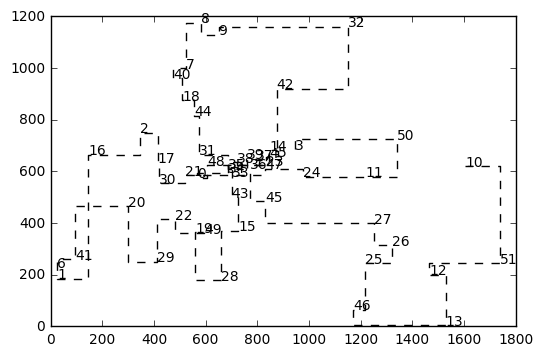

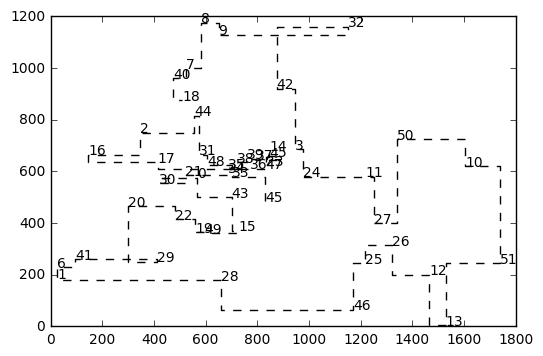

In [179]:
show_path(path_hc)
show_path(path_hc2)

In [189]:
from math import exp
import random


alpha = 0.95

def random_neighbour(s, eval_func):
    return mutator(s)

def exp_cooling(T, k, kmax):
    return T * (alpha ** k)

def acceptance_func(e1, e2, T):
    return exp(-max(0, e2 - e1) / T)

def simulated_annealing(eval_func, s0, neighbour_func=random_neighbour, kmax=100, temp_schedule=exp_cooling, T=100.0, acc_func=acceptance_func):
    s = s0
    for k in xrange(kmax):
        t = temp_schedule(T, k, kmax)
        s_new = neighbour_func(s, eval_func)
        
        if eval_func(s_new) < eval_func(s):
            s = s_new
        else:  
            if acc_func(eval_func(s), eval_func(s_new), t) >= random.uniform(0, 1):
                s = s_new
        
        # print eval_func(s)
        
    return s

In [203]:
path_sa = simulated_annealing(path_length, p, kmax=10000, T=1000)
print path_length(path_sa)

10855.0


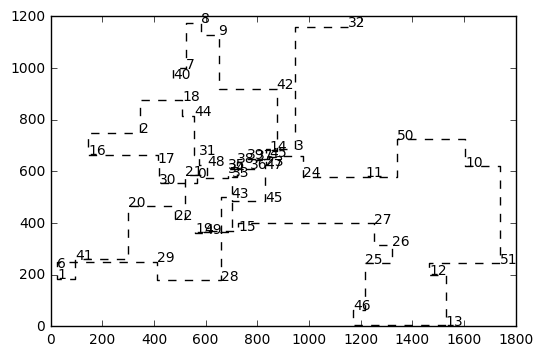

In [204]:
show_path(path_sa)